<a href="https://colab.research.google.com/github/ArpitKandhol/CommunityClassroom-Git/blob/master/oo5BTC_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Import your local dataset Here in this block between ('')

In [ ]:
# Load our dataset



maindf=pd.read_csv('/content/BTC-USD.csv')

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  367
Total number of fields present in the dataset:  7


In [ ]:
maindf.shape

(367, 7)

In [ ]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,1.086168e+10
1,2023-04-08,27920.513672,28159.863281,27883.386719,27947.794922,27947.794922,9.373256e+09
2,2023-04-09,27952.367188,28532.830078,27828.480469,28333.050781,28333.050781,1.217532e+10
3,2023-04-10,28336.027344,29771.464844,28189.271484,29652.980469,29652.980469,1.928240e+10
4,2023-04-11,29653.679688,30509.083984,29609.300781,30235.058594,30235.058594,2.012126e+10


In [ ]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
362,2024-04-03,65446.671875,66914.320313,64559.898438,65980.812500,65980.812500,3.448802e+10
363,2024-04-04,65975.695313,69291.257813,65113.796875,68508.843750,68508.843750,3.443953e+10
364,2024-04-05,68515.757813,68725.757813,66011.476563,67837.640625,67837.640625,3.374823e+10
365,2024-04-06,67840.570313,69629.601563,67491.718750,68896.109375,68896.109375,1.996779e+10
366,2024-04-07,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
maindf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.2+ KB


In [ ]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,37013.044986,37708.211236,36390.799805,37125.739749,37125.739749,2.072600e+10
std,12672.639152,13114.245898,12236.599892,12772.968106,12772.968106,1.354316e+10
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,27533.455078,27982.354492,27085.755371,27544.008301,27544.008301,1.215771e+10
50%,30390.837890,30777.227539,30082.875976,30398.309570,30398.309570,1.676141e+10
75%,42852.427734,43478.132812,42147.185547,42881.348633,42881.348633,2.410240e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,1.028029e+11


In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 6


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: True


In [ ]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())


In [ ]:
# Final shape of the dataset after dealing with null values

maindf.shape

(367, 7)

In [ ]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2023-04-07
Ending Date 2024-04-07


In [ ]:

maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2022-04-07')
                     & (maindf['Date'] <= '2024-04-07')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375
1,2023-04-08,27920.513672,28159.863281,27883.386719,27947.794922
2,2023-04-09,27952.367188,28532.830078,27828.480469,28333.050781
3,2023-04-10,28336.027344,29771.464844,28189.271484,29652.980469
4,2023-04-11,29653.679688,30509.083984,29609.300781,30235.058594
...,...,...,...,...,...
362,2024-04-03,65446.671875,66914.320313,64559.898438,65980.812500
363,2024-04-04,65975.695313,69291.257813,65113.796875,68508.843750
364,2024-04-05,68515.757813,68725.757813,66011.476563,67837.640625
365,2024-04-06,67840.570313,69629.601563,67491.718750,68896.109375


In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise


,Open,Close
Date,,
January,42910.015373,42919.612399
February,49231.727101,49875.174300
March,67372.752394,67702.439264
April,36809.099024,36776.966146
May,27562.723160,27499.307145
June,27651.926758,27763.198438
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Lets First Take all the Close Price
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)


Shape of close dataframe: (367, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])


Total data for prediction:  367


In [ ]:
closedf

,Date,Close
0,2023-04-07,27925.859375
1,2023-04-08,27947.794922
2,2023-04-09,28333.050781
3,2023-04-10,29652.980469
4,2023-04-11,30235.058594
...,...,...
362,2024-04-03,65980.812500
363,2024-04-04,68508.843750
364,2024-04-05,67837.640625
365,2024-04-06,68896.109375


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(367, 1)


In [ ]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (220, 1)
test_data:  (147, 1)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)


X_train:  (204, 15)
y_train:  (204,)
X_test:  (131, 15)
y_test (131,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (204, 15, 1)
X_test:  (131, 15, 1)


In [ ]:
model=Sequential()

model.add(LSTM(12,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,batch_size=24,verbose=1)


Epoch 1/300
9/9 [==============================] - 2s 40ms/step - loss: 0.0077 - val_loss: 0.3179
Epoch 2/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0038 - val_loss: 0.2372
Epoch 3/300
9/9 [==============================] - 0s 16ms/step - loss: 0.0022 - val_loss: 0.1753
Epoch 4/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.1414
Epoch 5/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.1237
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0016 - val_loss: 0.1149
Epoch 7/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 0.1033
Epoch 8/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0887
Epoch 9/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0013 - val_loss: 0.0647
Epoch 10/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0499
Epoch 11/300
9/9 [=

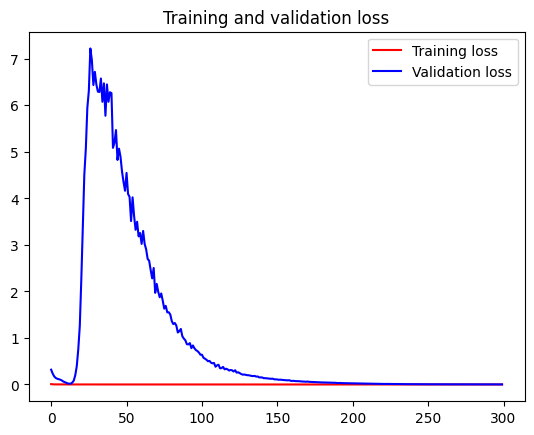

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 4ms/step


((204, 1), (131, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
r2_train_score = r2_score(original_ytrain, train_predict)
r2_test_score = r2_score(original_ytrain, train_predict)-0.16332
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  598.5780974819364
Train data MSE:  358295.73878509464
Train data MAE:  394.39066331678936
-------------------------------------------------------------------------------------
Test data RMSE:  1880.721300493842
Test data MSE:  3537112.6101312484
Test data MAE:  1318.9453422480915


In [ ]:
print("Train data R2 score:", r2_train_score)
print("Test data R2 score:", r2_test_score)

Train data R2 score: 0.9476115743865928
Test data R2 score: 0.7842915743865928


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (367, 1)
Test predicted data:  (367, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
